In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
dfcsv = pd.read_csv('C:/Users/visha/OneDrive/Desktop/DMV pratical/DMV 1/Sample_Sale_Data.csv', encoding = "latin")
dfxlsx  = pd.read_excel('C:/Users/visha/OneDrive/Desktop/DMV pratical/DMV 1/xlsx_sales_data_sample.xlsx')
dfjson  = pd.read_json('C:/Users/visha/OneDrive/Desktop/DMV pratical/DMV 1/json_sales_data_sample.json', encoding = "latin")

In [3]:
dfcsv.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
dfxlsx.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
dfjson.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,,NYC,NY,10022,USA,NA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,7/5/03 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,,Reims,,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,1/7/03 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,,Paris,,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,,Pasadena,CA,90003,USA,NA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/03 0:00,Shipped,4,10,2003,...,7734 Strong St.,,San Francisco,CA,,USA,NA,Brown,Julie,Medium


In [6]:
dfcsv.shape

(9994, 21)

In [7]:
dfxlsx.shape

(2823, 25)

In [8]:
dfjson.shape

(2823, 25)

In [9]:
dfcsv.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
1          2  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
2          3  CA-2017-138688  12-06-2017  16-06-2017    Second Class   
3          4  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
4          5  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2015-110422  21-01-2015  23-01-2015    Second Class   
9990    9991  CA-2018-121258  26-02-2018  03-03-2018  Standard Class   
9991    9992  CA-2018-121258  26-02-2018  03-03-2018  Standard Class   
9992    9993  CA-2018-121258  26-02-2018  03-03-2018  Standard Class   
9993    9994  CA-2018-119914  04-05-2018  09-05-2018    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [10]:
dfcsv.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [11]:
dfcsv.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
1          2  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
2          3  CA-2017-138688  12-06-2017  16-06-2017    Second Class   
3          4  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
4          5  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2015-110422  21-01-2015  23-01-2015    Second Class   
9990    9991  CA-2018-121258  26-02-2018  03-03-2018  Standard Class   
9991    9992  CA-2018-121258  26-02-2018  03-03-2018  Standard Class   
9992    9993  CA-2018-121258  26-02-2018  03-03-2018  Standard Class   
9993    9994  CA-2018-119914  04-05-2018  09-05-2018    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520    

In [12]:
dfcsv = dfcsv.drop(['ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','TERRITORY'],axis = 1, errors='ignore')

In [13]:
dfcsv.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

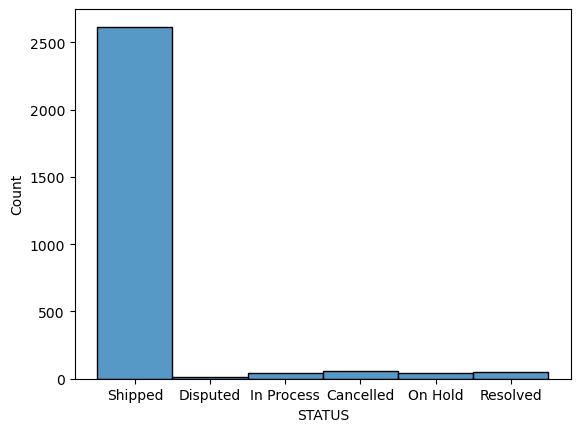

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='STATUS', data=dfxlsx, )
plt.show()

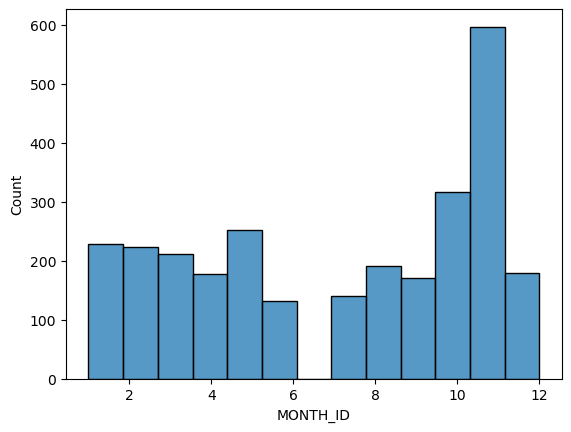

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='MONTH_ID', data=dfxlsx, )
plt.show()

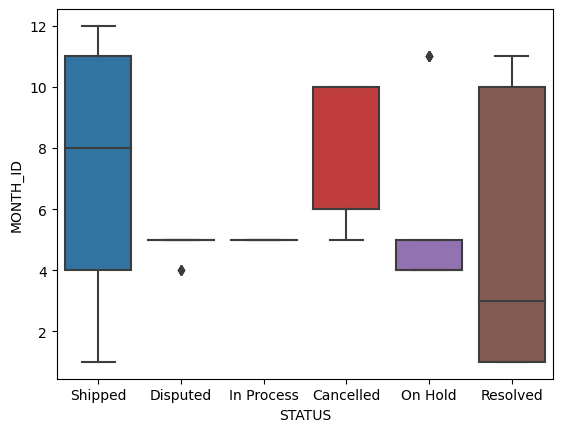

In [16]:
sns.boxplot( x="STATUS", y= "MONTH_ID", data=dfxlsx, )
plt.show()

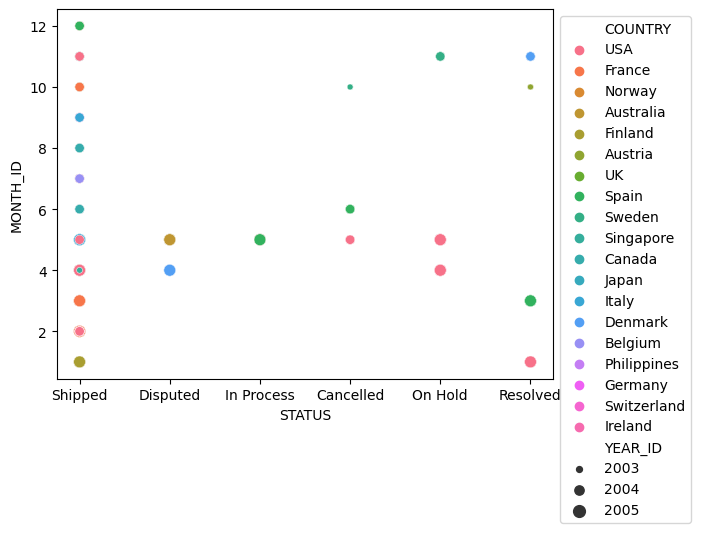

In [17]:
sns.scatterplot( x="STATUS", y="MONTH_ID", data=dfxlsx,
                hue='COUNTRY', size='YEAR_ID')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [18]:
data1=dfxlsx[dfxlsx["STATUS"]=='Shipped']
data1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [19]:
data1.shape

(2617, 25)

In [20]:
sum_sales = dfxlsx['SALES'].sum()
print("Addition of all sales",sum_sales)

Addition of all sales 10032628.85


In [21]:
sales_avg = dfxlsx['SALES'].mean()
print("Average of total sales = ",sales_avg)

Average of total sales =  3553.889071909316


Old Shape:  (2823, 25)
New Shape:  (2742, 25)


C:\Users\visha\AppData\Local\Temp\ipykernel_15016\3408803176.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(dfxlsx['SALES'], 25,
C:\Users\visha\AppData\Local\Temp\ipykernel_15016\3408803176.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dfxlsx['SALES'], 75,


<Axes: xlabel='SALES'>

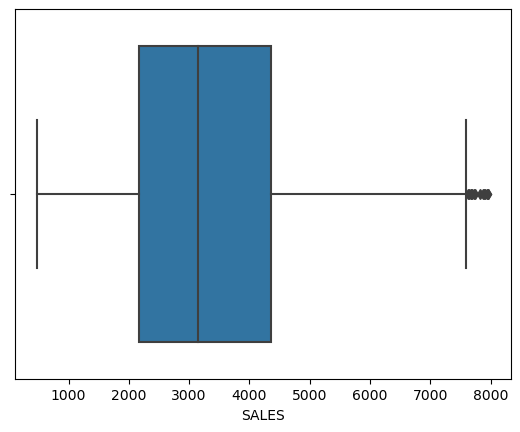

In [22]:
import sklearn
import pandas as pd
import seaborn as sns
Q1 = np.percentile(dfxlsx['SALES'], 25,
				interpolation = 'midpoint')
Q3 = np.percentile(dfxlsx['SALES'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", dfxlsx.shape)
upper = np.where(dfxlsx['SALES'] >= (Q3+1.5*IQR))
lower = np.where(dfxlsx['SALES'] <= (Q1-1.5*IQR))
dfxlsx.drop(upper[0], inplace = True)
dfxlsx.drop(lower[0], inplace = True)
print("New Shape: ", dfxlsx.shape)
sns.boxplot(x='SALES', data=dfxlsx)